# Logistic map

Logistic map [1] is a discrete time dynamical system defined by:

$$x[n+1] = r \, x[n] \, \left( 1 - x[n] \right)$$
    	
where $x \in [0,1]$ represents the ratio of existing population to the maximum possible population and $r \in [0,4]$.




In [2]:
import discrete
import numpy as np
import matplotlib.pyplot as plt

## Periodic example

In [3]:
t, x = discrete.logistic_map(n = 1000, r = 3.2, x0 = 0.2)
ti = 900
tf = 1000

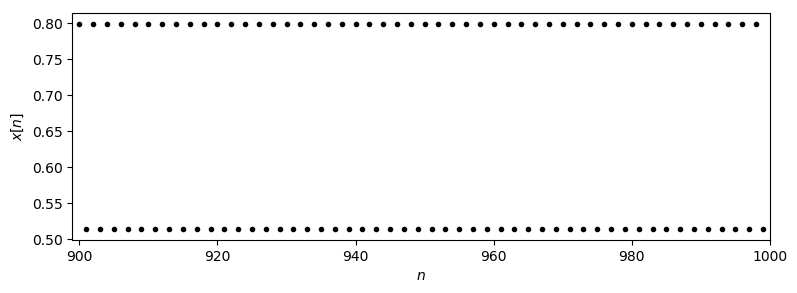

In [4]:
# Plotting time series
plt.figure(num = None, figsize = ((9,3)), dpi = 100)
plt.plot(t[ti:tf], x[ti:tf], '.k')
plt.ylabel(r"$x[n]$")
plt.xlabel(r"$n$")
plt.xlim(t[ti-1], t[tf])
plt.show()

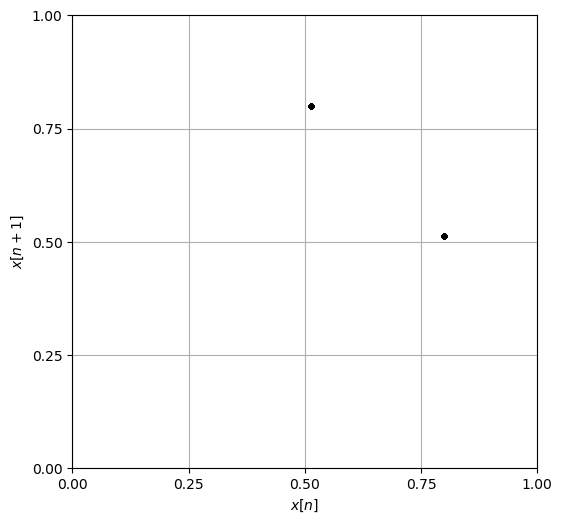

In [5]:
# Plotting first return
plt.figure(num = None, figsize = ((6,6)), dpi = 100)
plt.plot(x[ti:tf-1:1], x[ti+1:tf:1], '.k')
plt.grid( True )
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel(r"$x[n]$")
plt.ylabel(r"$x[n+1]$")
plt.xticks([0.00, 0.25, 0.50, 0.75, 1.00])
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00])
plt.show()


## Chaotic example

In [6]:
t, x = discrete.logistic_map(n = 1000, r = 4.0, x0 = 0.2)
ti = 900
tf = 1000

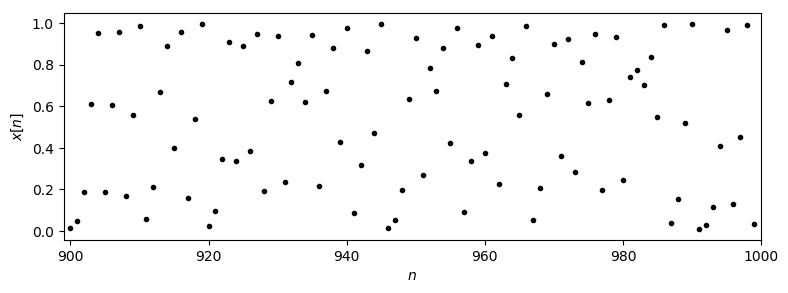

In [7]:
# Plotting time series
plt.figure(num = None, figsize = ((9,3)), dpi = 100)
plt.plot(t[ti:tf], x[ti:tf], '.k')
plt.ylabel(r"$x[n]$")
plt.xlabel(r"$n$")
plt.xlim(t[ti-1], t[tf])
plt.show()

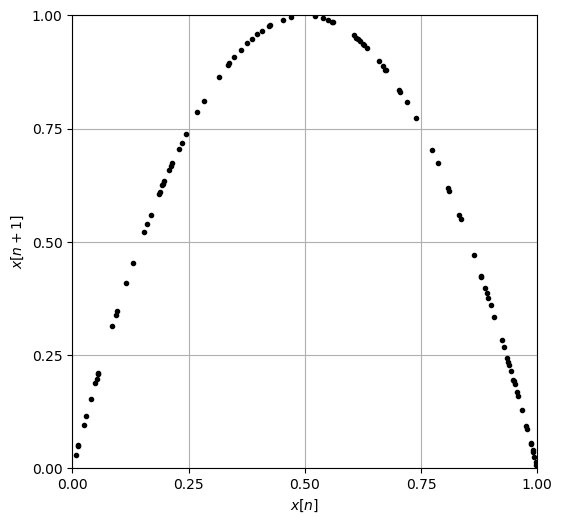

In [8]:
# Plotting first return
plt.figure(num = None, figsize = ((6,6)), dpi = 100)
plt.plot(x[ti:tf-1:1], x[ti+1:tf:1], '.k')
plt.grid( True )
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel(r"$x[n]$")
plt.ylabel(r"$x[n+1]$")
plt.xticks([0.00, 0.25, 0.50, 0.75, 1.00])
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00])
plt.show()

## Bifurcation diagram

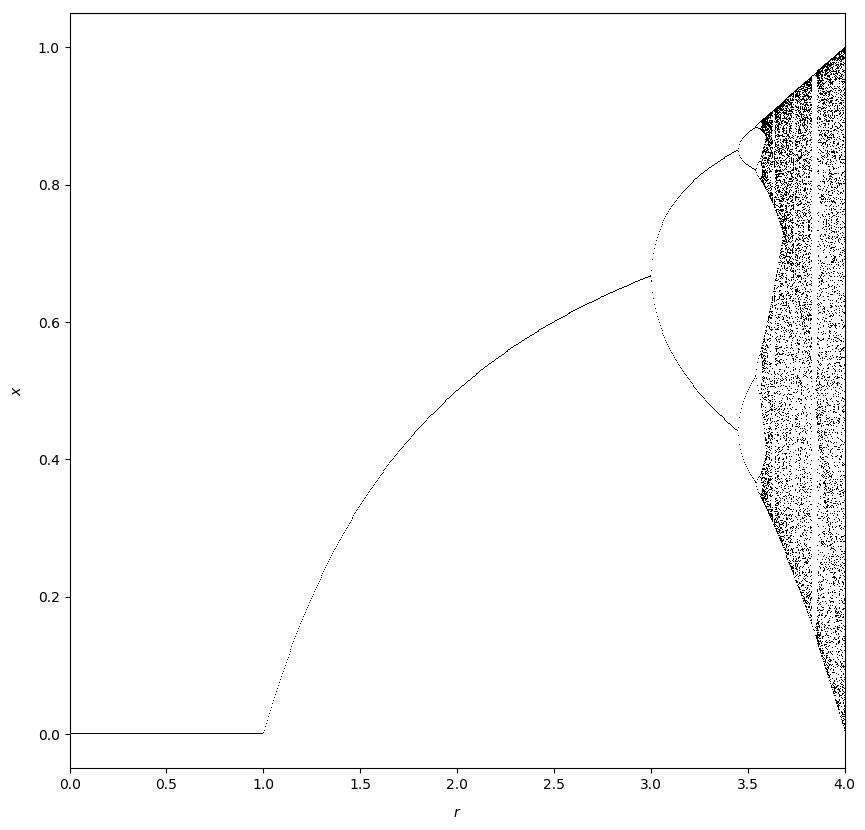

In [9]:
r_min, r_max, dr = 0.0, 4.0, 0.005
r_values = np.arange(r_min, r_max+dr, dr)
ti = 850
tf = 1000
dt = tf-ti

plt.figure(num = None, figsize=(10,10), dpi = 100)
for r in r_values:
    t, x = discrete.logistic_map(n = 1000, r = r, x0 = 0.2)
    plt.plot([r]*dt, x[ti:tf], ',k')
    del t, x
plt.ylabel(r"$x$", labelpad = 10)
plt.xlabel(r"$r$", labelpad = 10)
plt.xlim(r_min, r_max)
plt.show()

## Lypunov exponent

The Lyapunov exponent ($\lambda$) of a dynamical system represents the average exponential rate at which nearby trajectories deviate from each other with time. For one-dimensional discrete time system, it is calculated by

$$\lambda \; = \; \lim_{n \rightarrow \infty } \: \frac{1}{n} \: \sum_{i=1}^{n} \: \ln\left( \, f'(x[i]) \, \right )$$

If $\lambda < 0$, the separation between neighboring trajectories will decrease in time. If $\lambda > 0$, neighboring trajectories will diverge exponentially from each other at large $n$. 

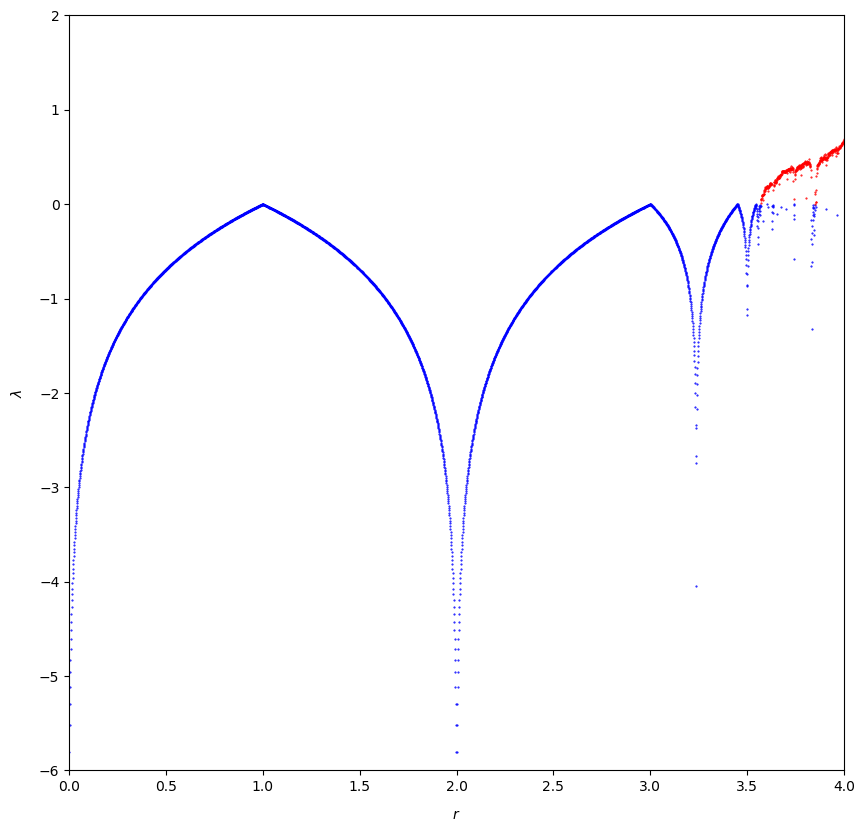

In [16]:
r_min, r_max, dr = 0.001, 4.0, 0.001
r_values = np.arange(r_min, r_max+dr, dr)

plt.figure(num = None, figsize=(10,10), dpi = 100)
for r in r_values:
    lyapunov = discrete.logistic_map_lyapunov(n_transient = 1000, n = 1000, r = r, x0 = 0.2)
    if lyapunov <= 0.:
        plt.plot(r, lyapunov, '.b', markersize = 1)
    else:   
        plt.plot(r, lyapunov, '.r', markersize = 1)
    del lyapunov
plt.ylabel(r"$\lambda$", labelpad = 10)
plt.xlabel(r"$r$", labelpad = 10)
plt.xlim(r_min, r_max)
plt.ylim(-6, 2)
plt.show()

## Reference

[1] May, R. M., Simple mathematical models with very complicated dynamics, Nature, 261(5560), 459-467p (1976). DOI: [10.1038/261459a0](https://doi.org/10.1038/261459a0)